In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from transformers import AutoTokenizer, AutoModelForTokenClassification
from tensorflow.keras.models import load_model

C:\inter\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labels_list = ["O", "cat", "dog", "elephant", "butterfly", "sheep", "cow", "horse", "hen", "spider", "squirrel" ]

In [3]:
img_class_name = ['butterfly','cat','cow','dog','elephant','hen','horse','sheep','spider','squirrel']

In [4]:
ner_model_path = "ner_model"  # Folder where the model is saved
ner_model = AutoModelForTokenClassification.from_pretrained(ner_model_path) #model for animals ner
ner_tokenizer = AutoTokenizer.from_pretrained(ner_model_path)

In [5]:
image_classification_model = load_model("res_model.keras") #model for image classification

In [6]:
def predict_animal_from_text(text): #function to search for an animal in the text
    inputs = ner_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = ner_model(**inputs)
    predictions = outputs.logits.argmax(dim=-1)
    for i in range(len(predictions[0])):
        if predictions[0][i] !=0 :
            return labels_list[predictions[0][i]]
    
    return None

In [7]:
#Test text ner

In [8]:
text_input = "There is a cat in the picture."

In [9]:
text_res = predict_animal_from_text(text_input)

In [10]:
text_res

'cat'

In [11]:
def predict_animal_from_image(image_path): #function to search for animals in the image
    img = Image.open(image_path)
    img = img.resize((128, 128))  
    img = np.array(img) / 255.0  
    img = np.expand_dims(img, axis=0) 

    predictions = image_classification_model.predict(img)
    animal_class = np.argmax(predictions)  
    return img_class_name[animal_class]

In [12]:
def visualize_image(image_path): #function for image visualization
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [13]:
#Test image classification

In [30]:
image_input_path = r"Training\raw-img\cat\1.jpeg"

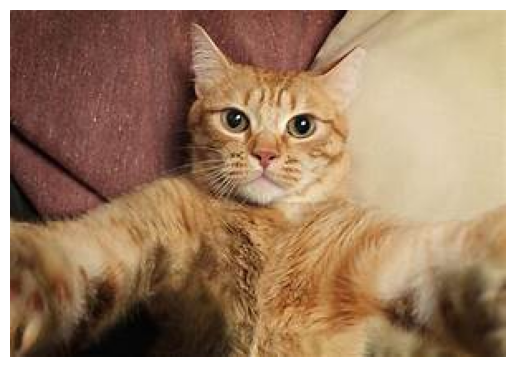

In [31]:
visualize_image(image_input_path)

In [23]:
predicted_animal_class = predict_animal_from_image(image_input_path )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [24]:
predicted_animal_class

'cat'

In [25]:
def validate_text_and_image(text, image_path): #a function for comparing an animal in the text and in the picture
    # Prediction for the text
    animals_in_text = predict_animal_from_text(text)

    # Prediction for the image
    predicted_animal_class = predict_animal_from_image(image_path)

    # Checking for a match
    if animals_in_text == predicted_animal_class:
        return True
    else:
        return False


In [26]:
#Final test

In [32]:
text_input = "There is a cat in the picture."
image_input_path = r"Training\raw-img\cat\1.jpeg"

In [33]:
result = validate_text_and_image(text_input, image_input_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [34]:
print("Is the statement true?", result)

Is the statement true? True
